In [1]:
import json
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open("stored_variables/politics_author_history.json", "r") as f:
    politics_author_history = json.load(f)

In [3]:
print(len(list(politics_author_history.values())[0]))

15149


In [4]:
sorted(list(politics_author_history.values())[0], key = lambda x : x[1])

[['reddit.com', 1135471163],
 ['reddit.com', 1136262610],
 ['reddit.com', 1136992548],
 ['reddit.com', 1139503715],
 ['reddit.com', 1139547140],
 ['reddit.com', 1142234596],
 ['reddit.com', 1142276688],
 ['reddit.com', 1142369982],
 ['reddit.com', 1142587416],
 ['reddit.com', 1142587685],
 ['reddit.com', 1142736120],
 ['reddit.com', 1142747591],
 ['reddit.com', 1143159452],
 ['reddit.com', 1143160487],
 ['reddit.com', 1143179440],
 ['reddit.com', 1143663272],
 ['reddit.com', 1143663404],
 ['reddit.com', 1143832504],
 ['reddit.com', 1143833556],
 ['reddit.com', 1143942942],
 ['reddit.com', 1143943213],
 ['reddit.com', 1143998717],
 ['reddit.com', 1144213581],
 ['reddit.com', 1144266218],
 ['reddit.com', 1144606226],
 ['reddit.com', 1144606450],
 ['reddit.com', 1144695028],
 ['reddit.com', 1144695104],
 ['reddit.com', 1144714992],
 ['reddit.com', 1144737824],
 ['reddit.com', 1144783524],
 ['reddit.com', 1144884930],
 ['reddit.com', 1145152082],
 ['reddit.com', 1145239465],
 ['reddit.com'

In [5]:
list(politics_author_history.keys())[:5]

['Psy-Kosh', 'Qwirk', 'Archer007', 'trivial', 'apodo']

In [6]:
input_subreddit_list = []
author_names = []

for k in politics_author_history.keys():
    input_subreddit_list.append(sorted(politics_author_history[k], key = lambda x : x[1]))
    author_names.append(k)

In [7]:
input_subreddit_list = [[x[0] for x in l] for l in input_subreddit_list]

(array([1.798e+03, 1.300e+02, 3.500e+01, 2.000e+01, 5.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000e+00, 3.94510e+03, 7.88920e+03, 1.18333e+04, 1.57774e+04,
        1.97215e+04, 2.36656e+04, 2.76097e+04, 3.15538e+04, 3.54979e+04,
        3.94420e+04]),
 <a list of 10 Patch objects>)

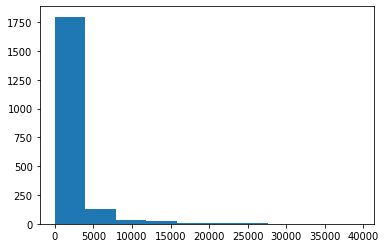

In [8]:
history_lengths = [len(l) for l in input_subreddit_list]

plt.hist(history_lengths)

(array([995., 325., 155., 118.,  67.,  53.,  50.,  37.,  27.,  17.]),
 array([1.0000e+00, 5.0020e+02, 9.9940e+02, 1.4986e+03, 1.9978e+03,
        2.4970e+03, 2.9962e+03, 3.4954e+03, 3.9946e+03, 4.4938e+03,
        4.9930e+03]),
 <a list of 10 Patch objects>)

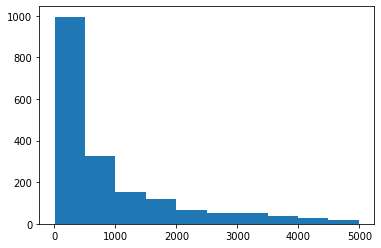

In [9]:
plt.hist([i for i in history_lengths if i < 5000])

(array([417., 230., 141., 111.,  96.,  91.,  79.,  64.,  49.,  42.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <a list of 10 Patch objects>)

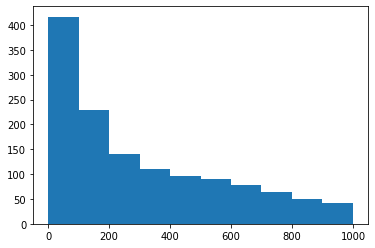

In [10]:
plt.hist([i for i in history_lengths if i < 1000])

In [11]:
print("Mean history length:", np.mean(history_lengths))
print("Standard deviation of history lengths:", np.std(history_lengths))

Mean history length: 1569.1905
Standard deviation of history lengths: 3137.4876406465332


## Create Doc2Vec embeddings of the subreddits

In [12]:
user_docs = [TaggedDocument(input_subreddit_list[i], [author_names[i]]) for i in range(len(input_subreddit_list))]
subreddit_hist_model = Doc2Vec(user_docs, vector_size=50, window=10, min_count=5)

In [13]:
user_docs[0]

TaggedDocument(words=['reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'programming', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com

In [14]:
subreddit_hist_model.docvecs['Psy-Kosh']

array([ 4.8951225 ,  1.0940964 ,  0.03440212, -1.3326453 ,  1.0804864 ,
       -2.8469827 ,  0.44950378,  3.9109228 , -1.5664725 , -2.0678566 ,
       -2.7725558 , -1.1673723 , -2.3278675 , -5.3787966 , -3.8171587 ,
        0.48951128,  1.1577066 , -2.2814887 ,  1.2912558 ,  0.5960113 ,
        0.4837695 ,  1.4072965 ,  0.36507675, -2.2897491 ,  0.69196993,
       -2.4180784 ,  2.2970753 , -2.349598  , -2.3991594 , -1.3318279 ,
        3.4055424 ,  0.08340524, -5.9089437 ,  0.7722727 , -0.29113296,
       -1.7865027 ,  0.38888982,  2.4863672 ,  0.9003267 , -1.174637  ,
       -2.9690135 , -1.0797075 , -0.51791096,  0.27451536, -1.1606884 ,
       -1.093148  , -2.198829  ,  1.479513  ,  1.7442012 ,  1.5322645 ],
      dtype=float32)

In [15]:
subreddit_hist_vecs = np.array([subreddit_hist_model.docvecs[i] for i in author_names])

## Visualize document vectors with PCA and T-SNE

In [16]:
subreddit_pca = PCA(n_components=2)
subreddit_pca_points = subreddit_pca.fit_transform(subreddit_hist_vecs)
subreddit_pca.explained_variance_ratio_

array([0.12872922, 0.06148205], dtype=float32)

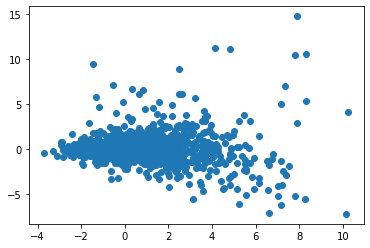

In [17]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1])
plt.show()

In [55]:
subreddit_tsne = TSNE(n_components=2)
subreddit_tsne_points = subreddit_tsne.fit_transform(subreddit_hist_vecs)

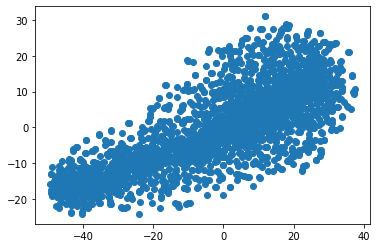

In [56]:
plt.scatter(subreddit_tsne_points[:,0], subreddit_tsne_points[:,1])
plt.show()

## What are the axes?

In [20]:
# first axis
subreddit_pca.components_[0]



array([ 0.00148963,  0.15364292,  0.00437993, -0.15453307, -0.14835201,
        0.02017853,  0.10445432,  0.18892449,  0.03696322, -0.14605379,
       -0.23242357,  0.04650296, -0.08069562, -0.12981279, -0.19228926,
       -0.09409032, -0.08895516, -0.08268216,  0.03016724,  0.28529656,
       -0.14592499,  0.1780058 ,  0.2184618 , -0.15075634, -0.04185928,
       -0.15342157,  0.18873613, -0.08594648, -0.20134449,  0.01091777,
        0.17087537,  0.01754541, -0.2553253 ,  0.12959723,  0.1048395 ,
        0.06023591,  0.24090694,  0.09193664,  0.20389569,  0.15453683,
       -0.07028732, -0.08424704,  0.09711968,  0.08308118,  0.1034466 ,
       -0.06624184, -0.21102016,  0.1832764 , -0.02347351, -0.16052552],
      dtype=float32)

## K-means clustering

In [21]:
km2 = KMeans(n_clusters=2)
km2.fit(subreddit_hist_vecs)
km2_labels = km2.labels_
color_vals = ['red', 'blue', 'green', 'orange', 'purple']
km2_label_colors = [color_vals[i] for i in km2_labels]

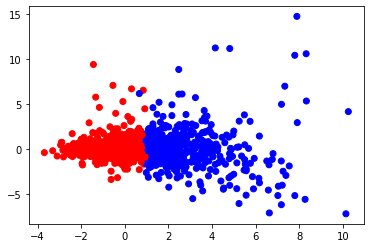

In [22]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km2_label_colors)
plt.show()

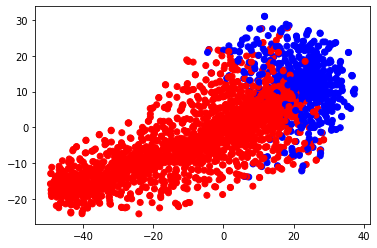

In [57]:
plt.scatter(subreddit_tsne_points[:,0], subreddit_tsne_points[:,1], c=km2_label_colors)
plt.show()

In [24]:
km3 = KMeans(n_clusters=3)
km3.fit(subreddit_hist_vecs)
km3_label_colors = [color_vals[i] for i in km3.labels_]

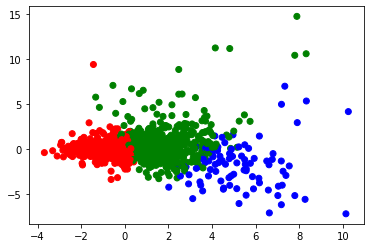

In [25]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km3_label_colors)
plt.show()

In [26]:
km4 = KMeans(n_clusters=4)
km4.fit(subreddit_hist_vecs)
km4_label_colors = [color_vals[i] for i in km4.labels_]

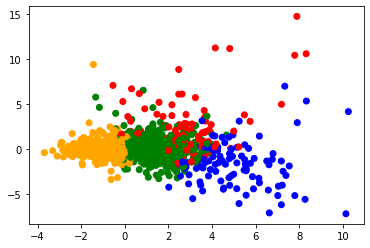

In [27]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km4_label_colors)
plt.show()

## PCA and clustering on original subreddit vectors

In [38]:
all_subreddits = sorted(list(set([i for l in input_subreddit_list for i in l])))
subreddit_reverse_dict = {all_subreddits[i] : i for i in range(len(all_subreddits))}
subreddit_tf = np.zeros((len(input_subreddit_list), len(all_subreddits)))

for i in range(len(input_subreddit_list)):
    for s in input_subreddit_list[i]:
        subreddit_tf[i, subreddit_reverse_dict[s]] += 1


In [39]:
print(len(np.sum(subreddit_tf, axis=0)))
print(len(all_subreddits))

14606
14606


In [47]:
subreddit_df = np.sum(np.where(subreddit_tf > 0, 1, 0), axis=0)
subreddit_idf = len(input_subreddit_list) / subreddit_df

subreddit_tfidf = subreddit_tf * subreddit_idf
subreddit_tfidf = subreddit_tfidf / np.sum(subreddit_tfidf, axis=1)[:, np.newaxis]

In [51]:
print(subreddit_tfidf.shape)
print(subreddit_idf.shape)
print(np.sum(subreddit_tfidf, axis=1).shape)

(2000, 14606)
(14606,)
(2000,)


In [48]:
raw_pca = PCA(n_components=2)
raw_pca_points = raw_pca.fit_transform(subreddit_tfidf)
raw_pca.explained_variance_ratio_

array([0.1014779 , 0.00614027])

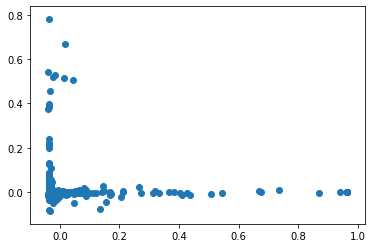

In [49]:
plt.scatter(raw_pca_points[:,0], raw_pca_points[:,1])
plt.show()

In [43]:
# importance order might be misleading: largest coefficients
subreddit_importance_order1 = list(np.argsort(np.abs(raw_pca.components_[0])))
subreddit_importance_order1.reverse()

for i in range(20):
    print(all_subreddits[subreddit_importance_order1[i]])
    
print()

subreddit_importance_order2 = list(np.argsort(np.abs(raw_pca.components_[1])))
subreddit_importance_order2.reverse()

for i in range(20):
    print(all_subreddits[subreddit_importance_order2[i]])

politics
SandersForPresident
AskReddit
news
todayilearned
hillaryclinton
russia
videos
PoliticalDiscussion
leagueoflegends
DotA2
OutOfTheLoop
worldnews
movies
nba
dataisbeautiful
nfl
SquaredCircle
reddevils
CFB

nba
leagueoflegends
The_Donald
nfl
AskReddit
Music
guysgonewild
LoLeventVoDs
SLRep
SandersForPresident
news
DotA2
ggRO
NYKnicks
CFB
triangle
BestThings
Mr_Trump
hillaryclinton
nsfw_gifs


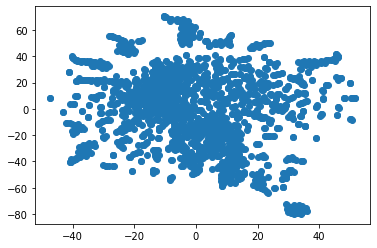

In [60]:
raw_tsne = TSNE(n_components=2)
raw_tsne_points = subreddit_tsne.fit_transform(PCA(n_components=50).fit_transform(subreddit_tfidf))
plt.scatter(raw_tsne_points[:,0], raw_tsne_points[:,1])
plt.show()

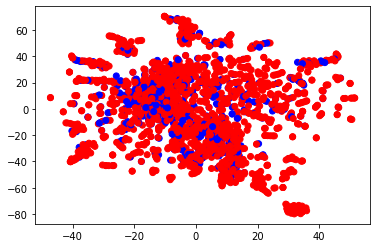

In [61]:
plt.scatter(raw_tsne_points[:,0], raw_tsne_points[:,1], c = km2_label_colors)
plt.show()

## Subreddit Word2Vec